# Weather and Crime Rates (2016)

#### Course: Data Bootcamp <br/> Name: Soojin Kim, Jaewoo Park, Sung Ho Kang <br/> Project Date: Dec 20th, 2017 <br/>

Background:
    Though it may seem logical that people try to avoid extreme weather, the National Weather Service has estimated hundreds of deaths in the United States directly related to the weather. Oppressive heat and other extreme weather conditions has also been researched to show that extreme weather is related aggressive behavior. Studies that support this income Baron and Bell 1976 and Anderson and Anderson 1995.
    Some academic research that can be applied to the relationship between weather and violence. The General Affective Aggression Model developed by Anderson et al. (1995 takes into many factors including temperature. The model describes a linear relationship between input factors such as personal and situational variables that affect a person’s arousal, state of affect, and cognitions.  In contrast there is the Negative Affect Escape Model developed by Baron and Bell et al. concluding that negative or aggressive feelings will increase only up to a certain inflection point, and then begin to decrease as the weather grows more intense.
    We would like to do a similar test for New York City weather and crime rates as well. 

**Research Questions:**
* How does temperature affect Property crimes & Violent crimes?
* Which season has the highest number of crimes?
* What is the relationship between precipitation and crime rates?

Introduction:
We took crime data from the US department of justice on a monthly basis from New York City - the two types of crime we analyzed were violent crimes and property crimes. The weather data was compiled by weather.gov specifically for NYC Central park. We tested for two specific types of climates factors, temperature and precipitation. Our initial hypothesis is that there would be a correlation between extreme climate and crimes, but the relationship would be stronger for violent crimes than that of property crimes. 

# 1.0 Importing Packages

In [454]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import numpy as np              # numpy package
import sys                      # system module, used to get Python version 
import datetime as dt           # date and time module

%matplotlib inline 

**New York 2016 Monthly Temperature**

In [455]:
#import data from CSV
temp_url = '/Users/admin/Desktop/Data_Bootcamp/central_park_monthlyannualtemp.csv'
df1 = pd.read_csv(temp_url, index_col=0)
central_park = df1.tail(2).transpose()
central_park.drop(central_park.index[12])
temperature = central_park['2016'].head(12)
temp = temperature.astype(float)
temp

JAN    34.5
FEB    37.7
MAR    48.9
APR    53.3
MAY    62.8
JUN    72.3
JUL    78.7
AUG    79.2
SEP    71.8
OCT    58.8
NOV    49.8
DEC    38.3
Name: 2016, dtype: float64

**New York 2016 Monthly Precipitation**

In [456]:
#import data from CSV
temp_url = '/Users/admin/Desktop/Data_Bootcamp/central_park_monthlyannualprecip.csv'
df1 = pd.read_csv(temp_url, index_col=0)
central_park = df1.tail(2).transpose()
central_park.drop(central_park.index[12])
precipitation = central_park['2016'].head(12)
precip = precipitation.astype(float)
precip

JAN    4.41
FEB    4.40
MAR    1.17
APR    1.61
MAY    3.75
JUN    2.60
JUL    7.02
AUG    1.97
SEP    2.79
OCT    4.15
NOV    5.41
DEC    2.89
Name: 2016, dtype: float64

In [501]:
#import data from CSV
crimes_1516_url = '/Users/admin/Desktop/Data_Bootcamp/crimes_2015-16.csv'
crimes_1617_url = '/Users/admin/Desktop/Data_Bootcamp/crimes_2016-17.csv'

df2 = pd.read_csv(crimes_1516_url, index_col=0)
df3 = pd.read_csv(crimes_1617_url, index_col=0)
central_park.drop(central_park.index[12])

#Transpose
crimes_1516 = df2.transpose()
crimes_1617 = df3.transpose()

#Merge two data
crimes_new = pd.concat([crimes_1516, crimes_1617])

#Clean data to remove unwanted stats
value_list = ['Violent Crimes', 'Property Crimes']
for i in crimes_new:
    if i in value_list:
        continue
    del crimes_new[i]
crimes_2016 = crimes_new.iloc[3:15]

#Change datatype to integer
crimes = crimes_2016.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
print (crimes)

        Violent Crimes  Property Crimes
Jan 16            1164             5621
Feb 16             961             4752
Mar 16            1146             5387
Apr 16            1117             5552
May 16            1305             6351
Jun 16            1302             6496
Jul 16            1420             6784
Aug 16            1397             7493
Sep 16            1267             6598
Oct 16            1218             6580
Nov 16            1171             6194
Dec 16            1035             6072


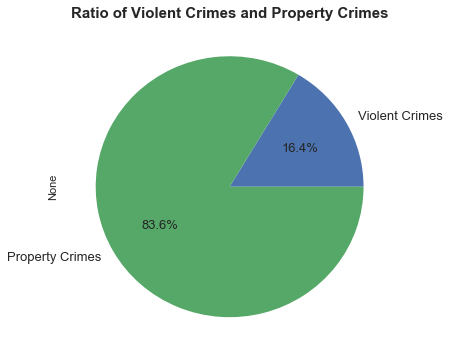

In [502]:
Chart1 = crimes[['Violent Crimes', 'Property Crimes']].sum()

fig, ax = plt.subplots(figsize=(6,6))
Chart1.plot(kind='pie',autopct='%.1f%%', fontsize=13, subplots=True , ax=ax)
ax.set_title('Ratio of Violent Crimes and Property Crimes', fontsize=15, weight='bold')
plt.show()

Exhibit 1 Analysis:
First, a pie chart was created to determine the ratio of property crimes vs. violent crimes within crimes overall in NYC. It was found that property crimes were much more common than violent crimes. This finding is important because the larger sample size of property crimes may yield more accurate results than that of the violent crimes. If there are large discrepancies in the upcoming analysis between the two types of crime, property crimes may be a more accurate measure of how weather affects crime.  

In [530]:
from datetime import datetime
df1 = crimes.assign(Temperature = [temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9],
                                   temp[10],temp[11]])
df2 = df1.assign(Precipitation = [precip[0],precip[1],precip[2],precip[3],precip[4],precip[5],precip[6],precip[7],
                                 precip[8],precip[9],precip[10],precip[11]])
df2

,Violent Crimes,Property Crimes,Temperature,Precipitation
Jan 16,1164,5621,34.5,4.41
Feb 16,961,4752,37.7,4.40
Mar 16,1146,5387,48.9,1.17
Apr 16,1117,5552,53.3,1.61
May 16,1305,6351,62.8,3.75
Jun 16,1302,6496,72.3,2.60
Jul 16,1420,6784,78.7,7.02
Aug 16,1397,7493,79.2,1.97
Sep 16,1267,6598,71.8,2.79
Oct 16,1218,6580,58.8,4.15


In [531]:
#seperate data into new dataframes based on temperature ranges
#below 50
below50 = df2[df2.Temperature < 50]

#50-70
between = df2[df2.Temperature <= 70]
between = between[between.Temperature >= 50]

#over 100
over70= df2[df2.Temperature > 70]

#New dataframe organized by temperature
rangelist = [below50, between, over70]
data_by_temp = pd.DataFrame()
data_by_temp['Ranges'] = ['<50', "50-70",">70"]

#calculate the number of crimes by temperature range
for i in value_list:
    data_by_temp[i] = [sum(x[i]) for x in rangelist]
    
data_by_temp

,Ranges,Violent Crimes,Property Crimes
0,<50,5477,28026
1,50-70,3640,18483
2,>70,5386,27371


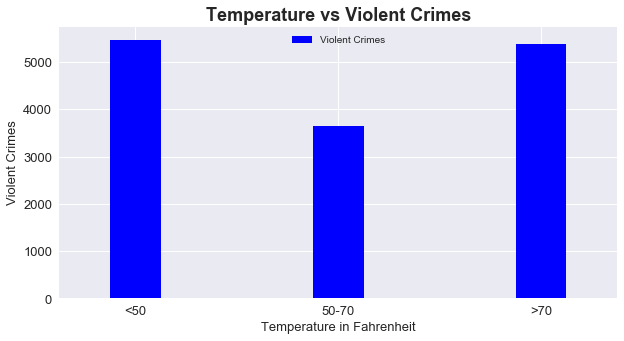

In [586]:
fig, ax = plt.subplots(figsize=(10,5))
data_by_temp.plot('Ranges','Violent Crimes', ax=ax, width=0.25, fontsize=13, kind='bar',color='blue')
ax.set_title("Temperature vs Violent Crimes", fontsize=18, weight='bold')
ax.set_ylabel("Violent Crimes", fontsize=13)
ax.set_xlabel("Temperature in Fahrenheit", fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

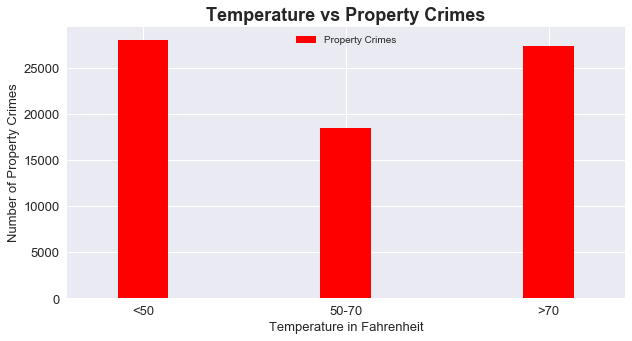

In [623]:
fig, ax = plt.subplots(figsize=(10,5))
data_by_temp.plot('Ranges','Property Crimes', ax=ax, width=0.25, fontsize=13, kind='bar',color='red')
ax.set_title("Temperature vs Property Crimes", fontsize=18, weight='bold')
ax.set_ylabel("Number of Property Crimes", fontsize=13)
ax.set_xlabel("Temperature in Fahrenheit", fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

Exhibit 2 & 3 Analysis
We had hypothesized that in extreme weather conditions that crime would actually increase. To prove this, the temperature was broken into three large buckets, "< 50", "50-70", and "> 70". "< 50" and "> 70" represented the extreme ranges of temperature while "50-70" represents the more moderate bucket of temperature. Both Temperature vs. Property Crimes and Temperature vs. Violent crimes show that there are more crimes in extreme temperatures. 

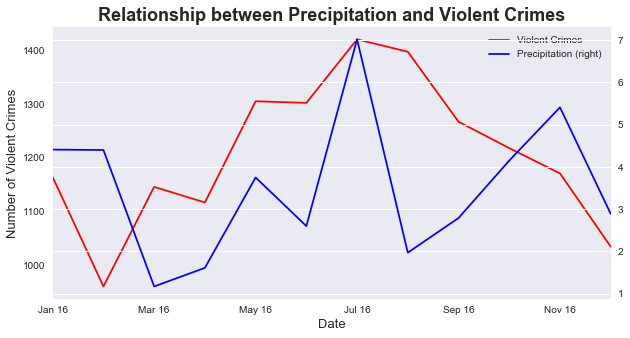

In [666]:
fig, ax = plt.subplots(figsize=(10,5))

df2.plot(df2.index,'Violent Crimes', kind = 'line', color = 'red', ax = ax)
df2.plot(df2.index,'Precipitation', kind = 'line', color = 'blue', ax = ax, secondary_y=True)

ax.set_title("Relationship between Precipitation and Violent Crimes", fontsize=18, weight='bold')
ax.set_ylabel("Number of Violent Crimes", fontsize=13)
ax.set_xlabel("Date", fontsize=13)

plt.show()

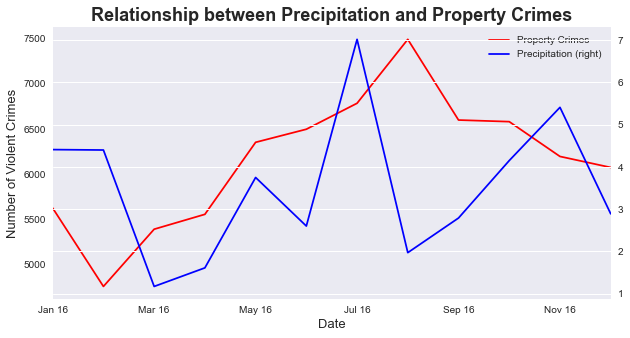

In [667]:
fig, ax = plt.subplots(figsize=(10,5))

df2.plot(df2.index,'Property Crimes', kind = 'line', color = 'red', ax = ax)
df2.plot(df2.index,'Precipitation', kind = 'line', color = 'blue', ax = ax, secondary_y=True)

ax.set_title("Relationship between Precipitation and Property Crimes", fontsize=18, weight='bold')
ax.set_ylabel("Number of Violent Crimes", fontsize=13)
ax.set_xlabel("Date", fontsize=13)

plt.show()

Exhibit 4 & 5 Analysis:
Exhibit 4 & 5 explores the relationship between crimes in NYC and precipitation. We similarly hypothesized that as precipitation increased, that crimes would increas as well. Some interesting points to note were that precipitation and violent crime, peaked together in July whereas precipitation when precipitation peaked, property crime hit a local low. 

Conclusion:
We were able to show that overall number of crimes seem to increase overall as weather grows more intense, though limitations include small data size. Temperature shows a more clear relationship on crime overall than that of precipitation. 

Further Notes:
If more data were available, it would be interesting to see how violent crime is affected geo-politically within the different boroughs of New York in relation to the weather as well. Other different climate factors such as humidity and different types of precipitation would have been good as well.
Temperature


Sources:
https://www.ucrdatatool.gov/Search/Crime/State/StatebyState.cfm?NoVariables=Y&CFID=154341342&CFTOKEN=ecf95a54f6f068a5-FD8D1AC0-E79E-3C2F-71848A2DD5DE1D42
http://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf
http://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualprecip.pdf